##  Лабораторная работа 8 

`Численное интегрирование`

`Хачатрян Армен БПМ153`

`Вариант 28`


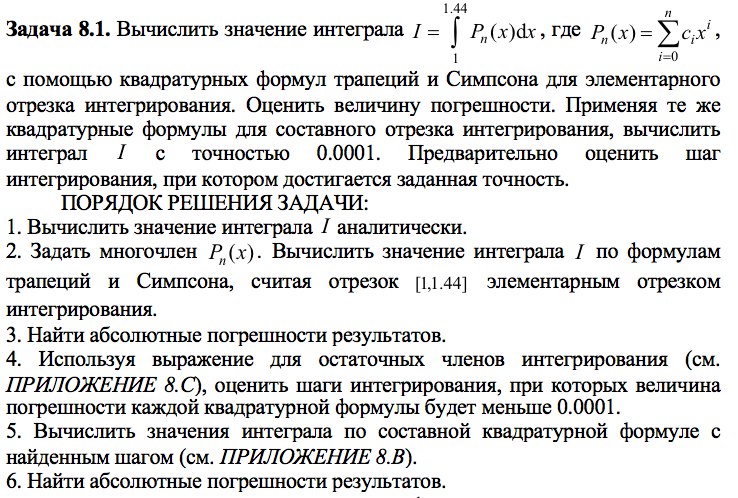

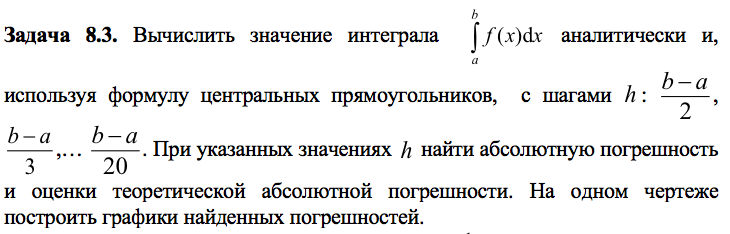

# Теория

### Формула трапеций
$$ I_i^{тр} = {h\over{2}}(f_{i-1}+f_i), i=1,\ldots,n $$
$$ I\approx \sum_{i=1}^n I_i^{тр} = {h\over{2}}(f_0+f_n+2\sum_{i=1}^{n-1}f_i) $$
### Формула Симсона 
$$ I_i^{(c)} = \int\limits_{x_{i-1}}^{x_{i}}P_2(x)dx = {h\over{6}}(f_{i-1}+4f_{i-{1\over{2}}}+f_i) $$
$$ I\approx \sum_{i=1}^n I_i^{c} = {h\over{6}}(f_0+f_n+4\sum_{i=1}^{n}f_{i-{1\over{2}}}+2\sum_{i=1}^{n-1}f_i) $$
### Формула центральных прямоугольников
$$ I_i^{(пр)} = hf(x_{i-{1\over{2}}}) = hf_{i-{1\over{2}}} $$
$$ I\approx \sum_{i=1}^n I_i^{пр}=h\sum_{i=1}^n f_{i-{1\over{2}}}$$

### Задача 8.1

$$ I = \int\limits^{1.44}_{1} P_{5}(x) d x $$ 
$$ P_{5}(x) = \sum\limits^{5}_{i=0}c_{i}x^{i} $$
$$ c_{0} = 6.1 \quad c_{1} = 0 \quad c_{2} = 7.5 \\ c_{3} = 7.4 \quad c_{4} = 0.6  \quad c_{5} = -0.6   $$



---

Начало

#### `1. Вычисление интеграла с помощью встроенных пакетов`

In [71]:
c = [6.1, 0, 7.5, 7.4, 0.6, -0.6]

In [72]:
def P5(x):
    return c[0]+c[1]*x+c[2]*x**2+c[3]*x**3+c[4]*x**4+c[5]*x**5

In [73]:
import scipy.integrate as integrate

In [74]:
I = integrate.quad(P5,1,1.44)
I

(13.585019701862397, 1.5082401662994013e-13)

#### `2. Вычисление интеграла по формулам трапеции и Симпсона`
$$ h = [1,1.44] $$

In [75]:
# по формуле трапеции с одним шагом
h = 0.44
I_tr = h*(P5(1)+P5(1.44))/2
I_tr

13.994888582963199

In [76]:
# абсолютная погрешность трап
abs(I[0] - I_tr)

0.40986888110080244

In [77]:
# по формуле Симпсона
I_sim = h*(P5(1) + 4*P5(1.22) + P5(1.44))/6
I_sim

13.5845991654912

In [78]:
# абсолютная погрешность Симп
abs(I[0] - I_sim)

0.00042053637119643383

#### `3. Оценка шагов, при которых погршеность будет меньше 0.0001`

$$\text{Трапеция: } |R| \leq \frac{M_{2}(b-a)h^{2}}{12} = \frac{0.44\cdot M_{2} h^{2}}{12}  < 10^{-4} \Rightarrow h < \sqrt{ \frac{12\cdot 10^{-4}}{0.44\cdot M_{2}} }$$
$$\text{Симпсон: } |R| \leq \frac{M_{4}(b-a)h^{4}}{2880} = \frac{0.44\cdot M_{4}h^{4}}{2880} < 10^{-4} \Rightarrow  h < \sqrt[\large{4}]{ \frac{2880\cdot 10^{-4}}{0.44 \cdot M_{4}} }$$

$$ \boldsymbol{M_{k} = \max_{[a,b]} |f^{(k)}(x)| = \max_{[1,1.44]}|P_{5}^{(k)}(x)| }$$
$$ P_{5}(x) = 6.1 + 7.5x^{2} + 7.4x^{3} + 0.6x^{4} - 0.6x^{5} $$
$$ P_{5}^{(1)}(x) = 15x + 22.2x^{2} + 2.4x^{3} - 3x^{4}$$
$$ \boldsymbol{P_{5}^{(2)}(x) = 15 + 44.4x + 7.2x^{2} - 12x^{3}}$$
$$ P_{5}^{(3)}(x) = 44.4 + 14.4x - 36x^{2}$$
$$ \boldsymbol{P_{5}^{(4)}(x) = 14.4 - 72x}$$
$$ P_{5}^{(5)}(x) = -72$$

In [79]:
def P5_2(x):
    return 15+44.4*x+7.2*x**2-12*x**3
def P5_4(x):
    return 14.4-72*x

In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
X = np.linspace(1,1.44,100)

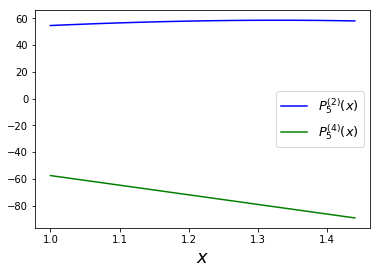

In [82]:
plt.plot(X, P5_2(X), 'b', label = '$P_{5}^{(2)}(x)$')
plt.plot(X, P5_4(X), 'g', label = '$P_{5}^{(4)}(x)$')
plt.xlabel(r'$x$',fontsize=18)
plt.legend(fontsize = 13)

In [83]:
M2 = abs(P5_2(1.44))
M4 = abs(P5_4(1.44))
M2, M4

(58.03411199999999, 89.27999999999999)

$$ M_{2} = 58.03411199999999 \quad M_{4} = 89.27999999999999 $$

$$ \text{Трапеция: } h < \sqrt{ \frac{12\cdot 10^{-4}}{0.44\cdot 58.03411199999999} } = 0.00686$$
$$ \text{Симпсон: }h < \sqrt[\large{4}]{ \frac{2880\cdot 10^{-4}}{0.44 \cdot 89.27999999999999} } = 0.2926  $$

In [84]:
((12*0.0001)/(0.44*58.03411199999999))**(1/2)

0.006855239196460148

In [85]:
((2880*0.0001)/(0.44*89.27999999999999))**(1/4)

0.2926148802715657

####  `4. Найдем интегралы с полученными шагами`

$$ \text{трапеции: } h = 0.006855239196460148$$
$$ \text{симпсон: } h = 0.2926148802715657$$

#### `4.1 Трапеции`

In [86]:
# число шагов 
n = int(0.44 / 0.006855239196460148)
n

64

In [87]:
# скорректированный шаг интегрирования
h = 0.44/n
h

0.006875

In [88]:
# узлы
X = [1+h*i for i in range(64)]
X.append(1.44)

$$ I_{i}^{\text{тр}} = \frac{h}{2}\cdot (f_{i-1}+f_{i})  $$

In [89]:
I_tr_115 = [h*(P5(X[i-1])+P5(X[i]))/2 for i in range(1,len(X))]
sum(I_tr_115)

13.585119356927416

In [90]:
# абсолютная погрешность трапеций
abs(I[0] - sum(I_tr_115))

9.965506501963262e-05

#### `4.2 Симпсон`

In [91]:
# число шагов 
n = 0.44 / 0.2926148802715657
n

1.5036829281943944

In [92]:
# скорректированный шаг интегрирования
h = 0.44/2
h

0.22

In [93]:
# узлы
X = [1+h*i for i in range(2)]
X.append(1.44)
X

[1.0, 1.22, 1.44]

$$ I_{i}^{\text{сим}} = \frac{h}{6}\cdot (f_{i-1}+4\cdot f_{i-1/2}+f_{i})  $$

In [94]:
I_sim_2 = [h*(P5(X[i-1])+P5(X[i]) + 4*P5((X[i-1]+X[i])/2))/6 for i in range(1,len(X))]
sum(I_sim_2)

13.584993418339202

In [95]:
# абсолютная погрешность симпсона
abs(I[0] - sum(I_sim_2))

2.6283523194337022e-05

---

### Задача 8.3

$$ \text{Посчитать } \int\limits_{b}^{a} f(x)dx, \quad f(x) = x^{2}(\sin(\sqrt[3]{x}) - 3), \quad  a = 0.5, b = 1.5$$

$$ h: \frac{b-a}{2}, \frac{b-a}{3}, \dots, \frac{b-a}{20} $$

In [96]:
def f(x):
    return x**2*(np.sin(x**1/3)-3)

In [97]:
# истинное значение
I_f = integrate.quad(f,0.5,1.5)
I_f

(-2.8449266833329028, 3.15850310720667e-14)

---

In [98]:
I_pr = []
for i in range(2,21):
    h = 1.0 / i
    n = i #int(1 / h)
    # узлы
    X = [0.5+h*k for k in range(n)]
    X.append(1.5)
    
    buf = [h*f((X[k-1]+X[k])/2) for k in range(1,len(X))]
    I_pr.append(sum(buf))
    

In [99]:
# полученная погрешность
R_get = abs(I_pr - np.ones(len(I_pr))*I_f[0])
R_get

array([ 0.0431923 ,  0.01920983,  0.01080814,  0.00691798,  0.00480444,
        0.00352992,  0.00270266,  0.00213547,  0.00172975,  0.00142956,
        0.00120124,  0.00102354,  0.00088255,  0.0007688 ,  0.0006757 ,
        0.00059855,  0.00053389,  0.00047917,  0.00043245])

$$ \text{Погрешность прямоугольников: } |R| \leq \frac{M_{2}(b-a)h^{2}}{24} $$
$$ M_{2} = \max_{[a,b]} |f^{(2)}(x)| $$
$$ f(x) = x^{2}(\sin(\sqrt[3]{x}) - 3) \quad f'(x) = \frac{(x^{4/3})}{3}*cos(x^{1/3})+2x(sin(x^{1/3})-3)$$

$$ f''(x) = \frac{-x^{2/3}}{9}*sin(x^{1/3})+\frac{10}{9}*x^{1/3}cos(x^{1/3})+2sin(x^{1/3})-6 $$

In [100]:
def d2f(x):
    return (-x**(2/3)/9)*np.sin(x**(1/3))+10/9*x**(1/3)*np.cos(x**(1/3))+2*np.sin(x**(1/3))-6   

Text(0,0.5,'$\\frac{d^{2}f}{dx^{2}}$')

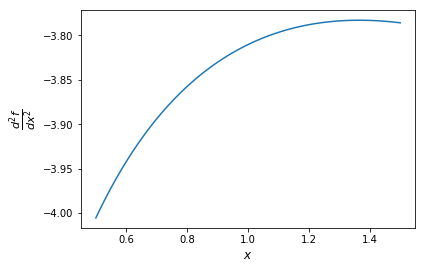

In [101]:
Z = np.linspace(0.5,1.5,100)
plt.plot(Z,d2f(Z))
plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$\frac{d^{2}f}{dx^{2}}$', fontsize = 16)

In [102]:
abs(d2f(0.5))

4.0056062575900402

$$ M_{2} =  4.0056062575900402$$
$$ |R| \leq \frac{M_{2}(b-a)h^{2}}{24} $$

In [103]:
# теоретические оценки для погрешностей (не превосходят)
R_estim = np.array([4.0056062575900402/(24*i**2) for i in range(2,21)])
R_estim

array([ 0.04172507,  0.01854447,  0.01043127,  0.00667601,  0.00463612,
        0.00340613,  0.00260782,  0.0020605 ,  0.001669  ,  0.00137934,
        0.00115903,  0.00098758,  0.00085153,  0.00074178,  0.00065195,
        0.00057751,  0.00051512,  0.00046233,  0.00041725])

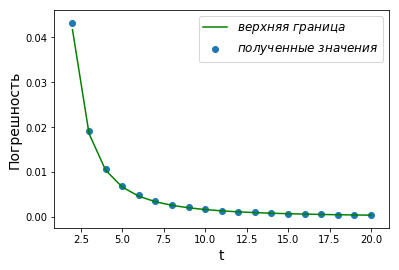

In [105]:
K = [t for t in range(2,21)]
plt.plot(K, R_estim, 'g', label = '$верхняя$ $граница$')
plt.scatter(K, R_get, label = '$полученные$ $значения$')
plt.ylabel('Погрешность', fontsize = 14)
plt.xlabel('t', fontsize = 14)
plt.legend(fontsize = 12)

$$ h(t) = \frac{b-a}{t}, t = 2,3,\dots,20 $$

---

$$\text{КОНЕЦ} $$